For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

***a. Visualize the fitted curve. Derive the resulting Energy consumption formula.***

The energy consumption formula is: 

                        Energy_hat = w*Net_Activity + b

We put in our value for w and b and get:

                        Energy_hat = 3.23*Net_Activity + 0.15
   
   ***b. Analyze prediction error distribution. What is an unbiased estimator?***

This is obviously a gaussian distribution with expected value = 0. The variance seems to be fairly constant as well. 
An unbiased estimator is an estimator with the same expected value as the true parameter it's estimating. Based on our observations from the histogram, the model is (on average) unbiased for the training data. 

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

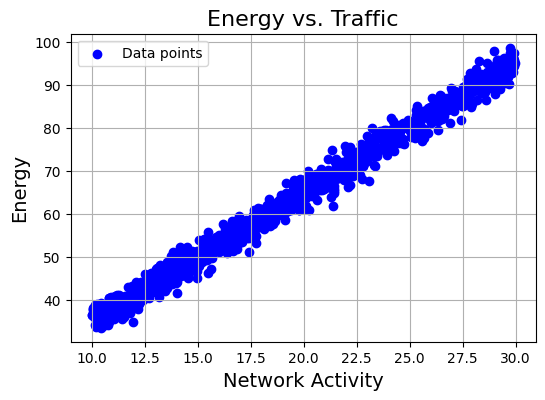

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [5]:
lr = LinearRegression(learning_rate=0.001, epochs=2) # chose 2 epochs based on explanation below

lr.fit(data['Net_Activity'].values.reshape(-1, 1), data['Energy'])

predictions = lr.predict(data['Net_Activity'].values.reshape(-1, 1))

**a. Visualize the fitted curve. Derive the resulting Energy consumption formula.**

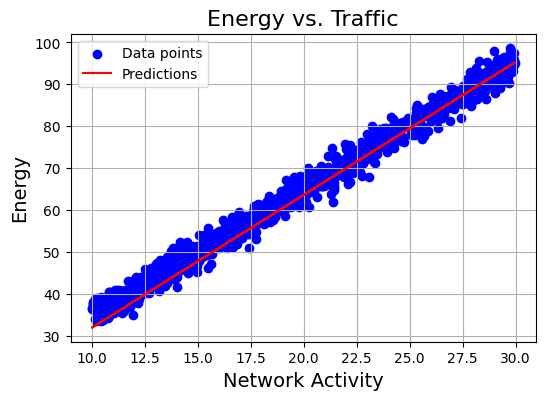

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, color='red', label='Predictions') 
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

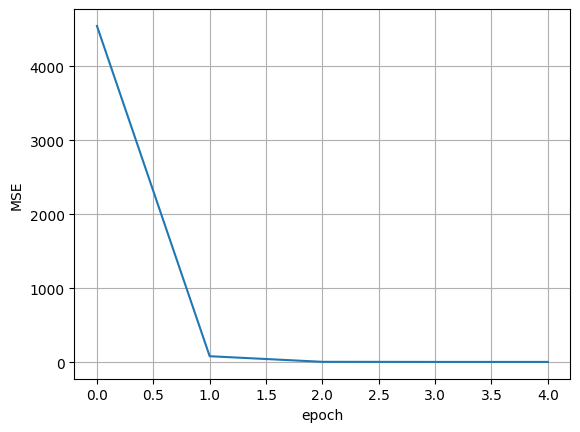

In [7]:
# Here I test the relationship between learning rate and epochs. Limit seems to be around epochs = 2

lr = LinearRegression(learning_rate=0.001, epochs=5)
lr.fit(data['Net_Activity'].values.reshape(-1, 1), data['Energy'])
import matplotlib.pyplot as plt
plt.plot(lr.losses)
plt.xlabel("epoch")
plt.ylabel("MSE") 
plt.grid(True)
plt.show()

In [8]:
predictions.sort()
print("")

w = round(float(lr.weights[0]), 2)
b = round(float(lr.bias), 2)
print(w)
print(b)


3.23
0.15


In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = data[['Net_Activity']].values   
y = data['Energy'].values           
y_hat = lr.predict(X)               

res = y - y_hat                     

print("Antall:", res.size)
print("Mean(res):", res.mean())     
print("Std(res):", res.std(ddof=1))
print("MAE:", np.mean(np.abs(res)))
print("RMSE:", np.sqrt(np.mean(res**2)))

Antall: 1000
Mean(res): 0.3602939544579477
Std(res): 2.3536100181930633
MAE: 1.906991383001588
RMSE: 2.3798639396486427


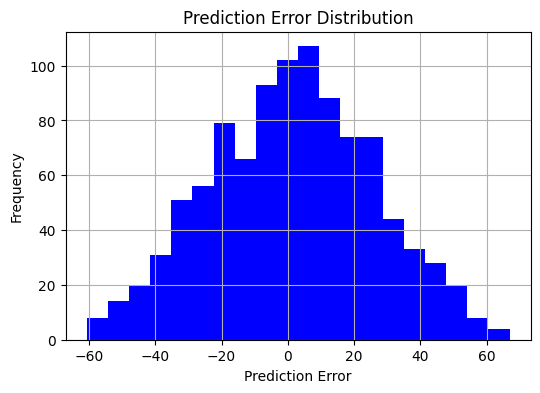

In [10]:
# Histogram of error distribution

plt.figure(figsize=(6, 4))
plt.hist(data['Energy'] - predictions, bins = 20, color='blue')
plt.xlabel("Prediction Error"); plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.grid(True)
plt.show()


## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

***a. Explain poor initial performance and your improvements***

*We can start by looking at the scatter: the two classes are interleaved in an XOR-like pattern (points of each class occupy opposite quadrants). A single line cannot split “top-left + bottom-right” from “top-right + bottom-left”. So the optimizer settles on a line that misclassifies roughly half the points, which results in test accuracy ≈ 0.48 (close to random). No feature scaling and only 100 epochs does also slow convergence, but even a perfectly trained linear model would still be bad here because the pattern isn’t linearly separable.*

*My improvement is primarily to change the decision function. We start with **w_0​\*x_0​+w_1\*​x_1​+b=0** and change it to **w_0​\*x_0​+w_1\*​x_1​+w_2(x_0*x_1)+b=0** which changes it from a single line to a curved (hyperbola-like) boundary in the original space. The sign of x_0\*x_1 is negative when x_0 and x_1 have opposite signs (which is why we use XOR) so the classifier can separate the diagonals and your accuracy jumps to appx. 0.89.*

*Finally, we could simply test for different epochs and learning rates to optimize the parameters which finnally gave us an accuracy of appx. 0.902*

   ***b. What is the model's inductive bias. Why is it important?***

*Inductive bias is the model’s built-in "prior beliefs". As mentioned above, the initial linear bias (**w_0​\*x_0​+w_1\*​x_1​+b=0**) couldn’t represent the XOR-like pattern. Adding the interaction term changed the bias just enough to express the right shape and improved performance. It is imporant because if the bias mismatches the problem, the model underfits → poor accuracy.*


***c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?***

*Look below for implementation.*
*Yes it can. I got train Accuracy: 0.9580 and test Accuracy: 0.9300, which is fairly good. It works because decision trees can handle data that is not linearly seperable as it is able to form regions on its own with its tree architecture. Following, it can split the dataset into XOR regions by itself.*

***d. Plot the ROC curve***

*Look below for implementation.*

---

In [11]:
# import of my implementation
from logistic_regression import LogisticRegression

In [12]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train_y = train["y"]
train = train.drop(columns=["split", "y"])
test_y = test["y"]
test = test.drop(columns=["split", "y"])

test

,x0,x1
500,0.026437,-0.776630
501,-0.842627,-0.856830
502,1.447394,0.776105
503,1.328300,-1.439170
504,0.157283,0.900862
...,...,...
995,-0.321591,-0.221557
996,-1.331425,-0.643386
997,-0.411979,0.526119
998,-0.130589,2.077277


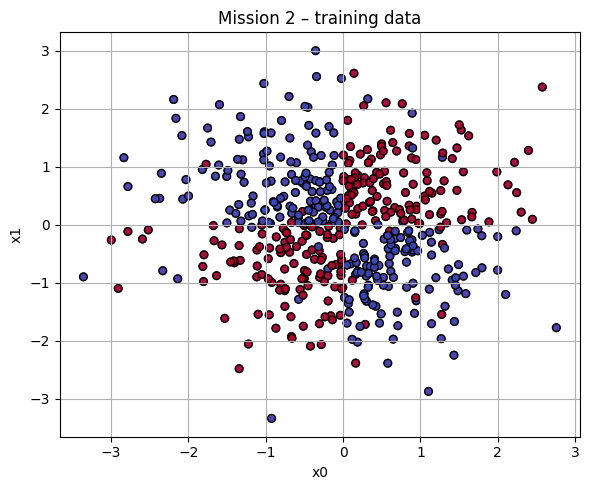

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm

# Load only train rows
df_train = pd.read_csv("mission2.csv")
df_train = df_train[df_train["split"] == "train"]

# Scatter: x0 on x-axis, x1 on y-axis, color by class y
plt.figure(figsize=(6,5))
plt.scatter(df_train["x0"], df_train["x1"],
            c=df_train["y"], cmap=plt.cm.coolwarm,
            s=30, edgecolor="k", alpha=0.85)


cmap = cm.coolwarm_r          # flip coolwarm
plt.scatter(df_train["x0"], df_train["x1"],
            c=df_train["y"], cmap=cmap, vmin=0, vmax=1,
            s=30, edgecolor="k", alpha=0.85)

legend = [
    Line2D([0],[0], marker='o', color='w', label='Class 0',
           markerfacecolor=cmap(0.05), markeredgecolor='k', markersize=8),
    Line2D([0],[0], marker='o', color='w', label='Class 1',
           markerfacecolor=cmap(0.95), markeredgecolor='k', markersize=8),
]


plt.grid(True)
plt.xlabel("x0"); plt.ylabel("x1")
plt.title("Mission 2 – training data")
plt.tight_layout()
plt.show()



Test accuracy: 0.4820


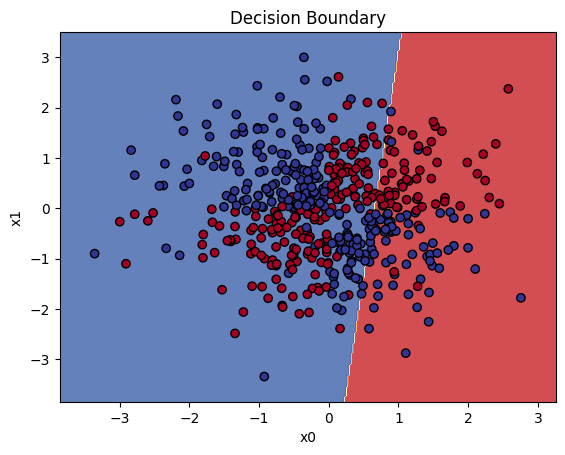

In [14]:
# Without feature engineering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc

train_fe = train.copy()
test_fe = test.copy()

# Train model and predict
before_fe_log = LogisticRegression(learning_rate=0.001, epochs=100)
before_fe_log.fit(train_fe.values, train_y.values)

preds = before_fe_log.predict(test_fe.values)
accuracy = np.mean(preds == test_y.values)

print(f"Test accuracy: {accuracy:.4f}")

# Mesh grid (add a small margin)
m = 0.5
x0_min, x0_max = train['x0'].min()-m, train['x0'].max()+m
x1_min, x1_max = train['x1'].min()-m, train['x1'].max()+m
xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 300),
                     np.linspace(x1_min, x1_max, 300))


grid = pd.DataFrame({'x0': xx.ravel(), 'x1': yy.ravel()})
grid_predictions = before_fe_log.predict(grid.values)

# # Probabilities on the grid (your model: p = sigmoid(Xw+b))
# z = grid @ before_fe_log.weights + before_fe_log.bias
# p = 1.0 / (1.0 + np.exp(-z))                # (N,)
# Z = p.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(train['x0'], train['x1'], c=train_y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.title('Decision Boundary')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


Test Accuracy: 0.8900


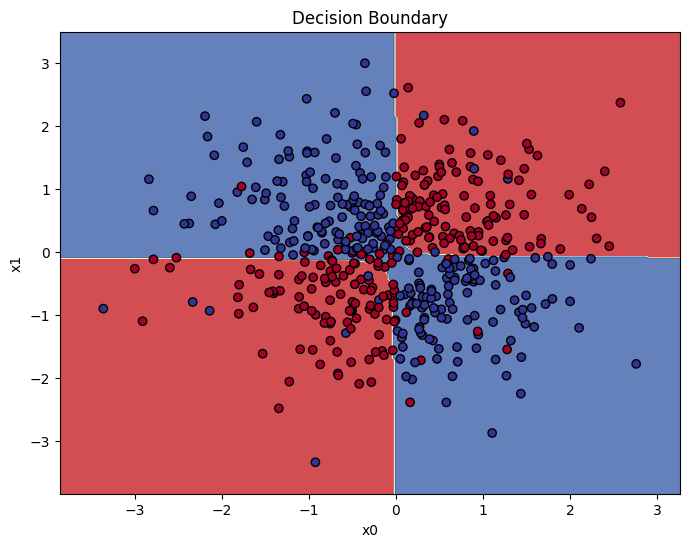

In [15]:
# With feature engineering

def feature_engineering(df):
    df = df.copy()
    df['x0_times_x1'] = df['x0'] * df['x1']
    return df

# This is the XOR problem. We can solve it by adding a feature which is the product of the two features
# So we go from w_0*x_0 + w_1*x_1 + b = 0
# To w_0*x_0 + w_1*x_1 + w_2(x_0*x_1) + b = 0

# Make engineered train/test
train_fe = feature_engineering(train.copy())
test_fe = feature_engineering(test.copy())

# Scale data
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_fe), columns=train_fe.columns)
test_scaled = pd.DataFrame(scaler.transform(test_fe), columns=test_fe.columns)

# Train the model and evaluate
lr = LogisticRegression(learning_rate=0.01, epochs=1000)
lr.fit(train_scaled.values, train_y.values)
predictions = lr.predict(test_scaled.values)
test_accuracy = np.mean(predictions == test_y.values)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Now to create the decision boundary

# Mesh grid (add a small margin)
m = 0.5
x0_min, x0_max = train['x0'].min()-m, train['x0'].max()+m
x1_min, x1_max = train['x1'].min()-m, train['x1'].max()+m
xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 300),
                     np.linspace(x1_min, x1_max, 300))

# Create grid, engineer the features & get predicitons
grid = pd.DataFrame({'x0': xx.ravel(), 'x1': yy.ravel()})
grid_fe = feature_engineering(grid)
grid_scaled = pd.DataFrame(scaler.transform(grid_fe), columns=grid_fe.columns)
grid_predictions = lr.predict(grid_scaled.values)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(train['x0'], train['x1'], c=train_y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.title('Decision Boundary')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [16]:
# We can try using different learning rates and epochs to see if test accuracy improves

train_fe = feature_engineering(train.copy())
test_fe = feature_engineering(test.copy())
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_fe), columns=train_fe.columns)
test_scaled = pd.DataFrame(scaler.transform(test_fe), columns=test_fe.columns)

best_accuracy = 0
best_rate = 0
best_epoch = 0
epochs = [10, 100, 1000, 10000, 100000]
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for rate in learning_rates:
    for epoch in epochs:
        lr = LogisticRegression(learning_rate=rate, epochs=epoch)
        lr.fit(train_scaled.values, train_y.values)
        predictions = lr.predict(test_scaled.values)
        test_accuracy = np.mean(predictions == test_y.values)
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_rate = rate
            best_epoch = epoch

print(f"Best accuracy: {best_accuracy:.4f}")
print(f"Best epoch: {best_epoch:.4f}")
print(f"Best learning rate: {best_rate:.4f}")

Best accuracy: 0.9020
Best epoch: 10000.0000
Best learning rate: 0.1000


In [17]:
# We finally train it using the best parameters

# Make engineered train/test
train_fe = feature_engineering(train.copy())
test_fe = feature_engineering(test.copy())

# Scale data
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_fe), columns=train_fe.columns)
test_scaled = pd.DataFrame(scaler.transform(test_fe), columns=test_fe.columns)

# Train the model and evaluate
lr = LogisticRegression(learning_rate=best_rate, epochs=best_epoch)
lr.fit(train_scaled.values, train_y.values)
predictions = lr.predict(test_scaled.values)
test_accuracy = np.mean(predictions == test_y.values)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9020


In [18]:
# Using sklearn.tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# x0*x1 is optional.
X_train = train[["x0","x1"]].values
y_train = train_y.values
X_test  = test[["x0","x1"]].values
y_test  = test_y.values

# Regularized tree
tree = DecisionTreeClassifier(
    max_depth=4,           # 4 gave best acc.
    min_samples_leaf=1,   # 1 gave best acc.
    random_state=42
)
tree.fit(X_train, y_train)

# Predict
y_tr_pred = tree.predict(X_train)
y_te_pred = tree.predict(X_test)
y_te_proba = tree.predict_proba(X_test)[:, 1]

print(f"Train Accuracy: {accuracy_score(y_train, y_tr_pred):.4f}")
print(f"Test  Accuracy: {accuracy_score(y_test,  y_te_pred):.4f}")
print("Confusion matrix:\n", confusion_matrix(y_test, y_te_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_te_proba))


Train Accuracy: 0.9580
Test  Accuracy: 0.9300
Confusion matrix:
 [[246  13]
 [ 22 219]]
ROC-AUC: 0.9221951649337542


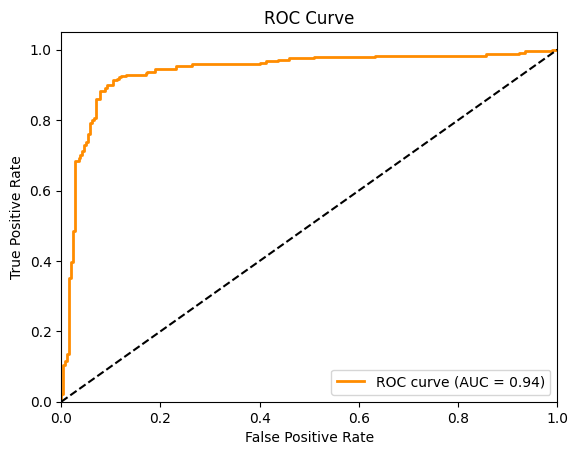

In [19]:
lr = LogisticRegression(learning_rate=best_rate, epochs=best_epoch)
lr.fit(train_scaled.values, train_y.values)

lr.plot_ROC_curve(test_fe.values, test_y.values)

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

***a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?***

We cleaned the data and tried using Decision Tree. This gave a non-sufficient result. Then, we were able to break the threshold by using Random Tree Classifier.

   ***b. Justify ROC AUC usage. Plot and interpret ROC.***

ROC AUC is well-suited for binary classification with class imbalance because it evaluates how well the model ranks positives over negatives across all thresholds, rather than rewarding majority-class guessing. With our class split, plain accuracy can be misleading, so ROC AUC is the appropriate metric here.
   
   ***c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.***

Solution below. Random Forest Classifier gave better results

---

In [20]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train_y = train['target'].values
train = train.drop(columns=['target'])

test_y = test['target'].values
test = test.drop(columns=['target'])
feature_cols = [c for c in train.columns if c.startswith("data_stream_")]

train.describe()

,data_stream_0,data_stream_1,data_stream_2,data_stream_3,data_stream_4,data_stream_5,data_stream_6,data_stream_7,data_stream_8,data_stream_9,data_stream_10
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.231075,-0.001476,0.018874,0.092223,0.010275,0.001074,-0.259861,0.052033,0.014515,0.008584,0.005827
std,1.165611,0.998400,1.008527,5.770973,1.003127,1.011421,1.101096,0.860646,1.007295,1.003524,1.022364
min,-5.323960,-3.601152,-4.498593,-9.999000,-3.565192,-4.010170,-4.240089,-3.840188,-3.356489,-4.604821,-3.744184
25%,-0.962776,-0.671684,-0.650891,-4.921500,-0.674551,-0.691569,-0.971924,-0.388031,-0.655914,-0.667893,-0.676547
50%,-0.231339,-0.006113,0.019951,0.139000,0.022558,-0.004920,-0.257525,0.158764,0.017438,0.010378,-0.001679
75%,0.500118,0.682696,0.709670,5.089500,0.689996,0.690551,0.485159,0.585619,0.689743,0.680877,0.708990
max,4.556261,3.568551,3.832173,9.996000,3.541632,3.627054,3.314975,3.574871,3.450825,3.753086,3.558211


In [21]:
test.describe()

,data_stream_0,data_stream_1,data_stream_2,data_stream_3,data_stream_4,data_stream_5,data_stream_6,data_stream_7,data_stream_8,data_stream_9,data_stream_10
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.230571,0.051608,0.023935,0.140914,0.004700,0.028538,-0.287263,0.017391,0.042902,0.013998,0.013795
std,1.189685,1.009624,1.009147,5.865329,1.012892,0.982984,1.116487,0.860646,1.001426,1.006138,1.016050
min,-5.171278,-3.234656,-3.237229,-9.997000,-3.565291,-3.278100,-4.222505,-4.130052,-3.125386,-3.397797,-3.306601
25%,-0.967006,-0.625120,-0.653469,-5.052750,-0.691448,-0.644124,-1.012093,-0.430571,-0.636648,-0.651008,-0.713580
50%,-0.241457,0.070618,0.010501,0.153000,-0.001229,0.033396,-0.308125,0.134666,0.028162,-0.000154,0.014072
75%,0.511249,0.719631,0.699008,5.321750,0.664744,0.670841,0.450499,0.556918,0.698027,0.681473,0.685006
max,3.893194,3.357571,3.683666,9.998000,3.451888,3.676763,3.495793,3.065291,3.462940,3.825133,3.416429


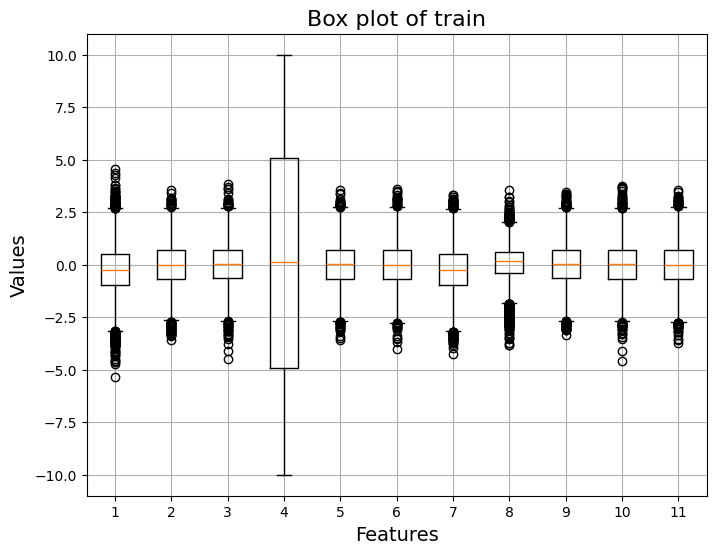

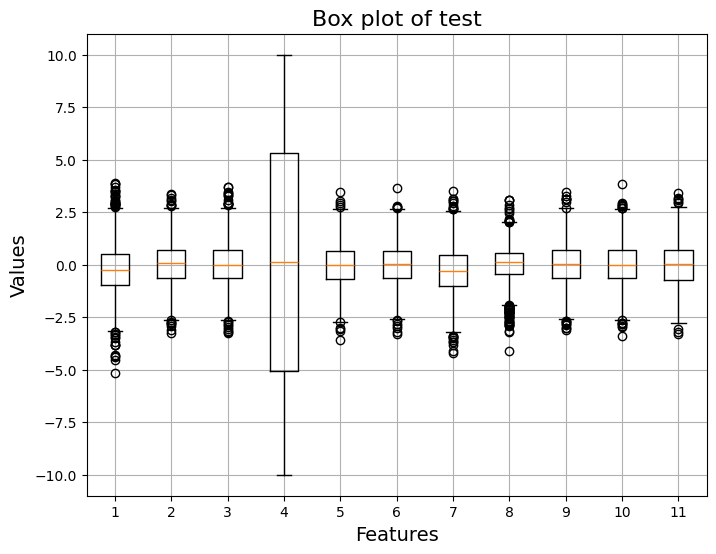

In [22]:
# box plot of data distribution
plt.figure(figsize=(8, 6))
plt.boxplot(train)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Box plot of train', fontsize=16)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(test)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Box plot of test', fontsize=16)
plt.grid(True)
plt.show()

**We can see that Feature 4 (data_stream_3) clearly stands out. Its box and whiskers are much wider than the others (spread roughly from about −10 to +10, with many extreme points), while the rest sit mostly within ~[−3, 3]. The same pattern appears in both train and test, so it’s not drift—just a feature with far higher variance/heavy tails.**

In [23]:
# scaling data with modulo 

from sklearn import tree, metrics, ensemble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stream = "data_stream_3"

train_stream = np.rint(train[stream].to_numpy()*1000).astype(np.int64)
test_stream  = np.rint(test[stream].to_numpy() *1000).astype(np.int64)

train_new = (train_stream % 2 == 0).astype(int)
test_new  = (test_stream  % 2 == 0).astype(int)
train[stream] = train_new
test[stream] = test_new

In [24]:
train_X = train[feature_cols].values
test_X = test[feature_cols].values

dt = tree.DecisionTreeClassifier()
dt.fit(train_X, train_y)
dt_proba = dt.predict_proba(test_X)[:, 1]

In [25]:
rf = ensemble.RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_leaf=3, n_jobs=1, random_state=42)
rf.fit(train_X, train_y)
rf_proba = rf.predict_proba(test_X)[:, 1]

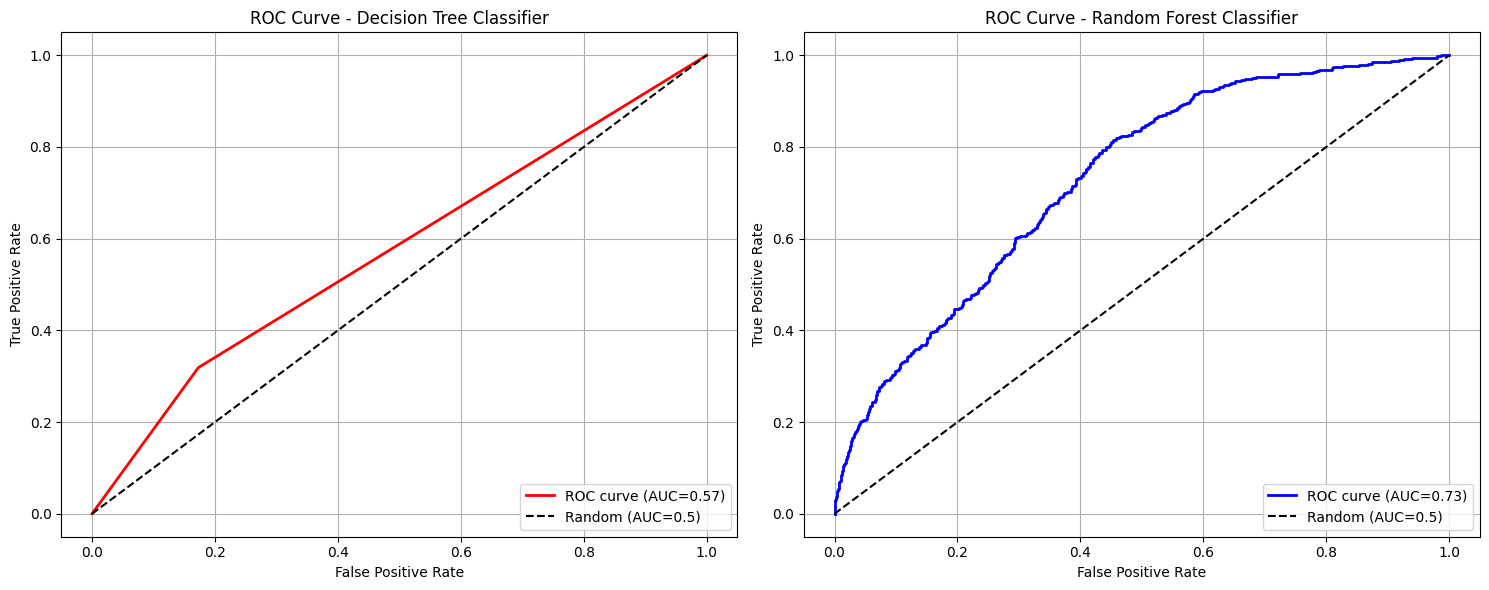

Decision Tree ROC AUC Score: 0.573
Random Forest ROC AUC Score: 0.731


In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt

# ROC / AUC 
fpr_dt, tpr_dt, _ = metrics.roc_curve(test_y, dt_proba)
auc_dt = metrics.roc_auc_score(test_y, dt_proba)

fpr_rf, tpr_rf, _ = metrics.roc_curve(test_y, rf_proba)
auc_rf = metrics.roc_auc_score(test_y, rf_proba)

# ROC plots (two subplots) 
plt.figure(figsize=(15, 6))

# Decision Tree
ax1 = plt.subplot(1, 2, 1)
ax1.plot(fpr_dt, tpr_dt, label=f"ROC curve (AUC={auc_dt:.2f})", c="red", linewidth=2)
ax1.plot([0, 1], [0, 1], c="black", ls="dashed", label="Random (AUC=0.5)")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curve - Decision Tree Classifier")
ax1.legend(loc="lower right")
ax1.grid(True)

# Random Forest
ax2 = plt.subplot(1, 2, 2)
ax2.plot(fpr_rf, tpr_rf, label=f"ROC curve (AUC={auc_rf:.2f})", c="blue", linewidth=2)
ax2.plot([0, 1], [0, 1], c="black", ls="dashed", label="Random (AUC=0.5)")
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Curve - Random Forest Classifier")
ax2.legend(loc="lower right")
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Decision Tree ROC AUC Score: {auc_dt:.3f}")
print(f"Random Forest ROC AUC Score: {auc_rf:.3f}")


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

  ***a. Explain your threshold-breaking strategy***

Guided by EDA, I corrected a misalignment between train and test. Missing-value heatmaps and side-by-side describe() tables showed that—except for ownership_type—the test columns were shifted by one position, and the values in grid_connections actually belonged in nexus_rating. I realigned the test set by shifting the columns and moving grid_connections into nexus_rating. After this fix, the test feature distributions closely matched the training set, which justifies the change. Then, by using ensemble.RandomForestRegressor, I was able to break the threshold

   ***b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?***

RMSLE is a log-scaled variant of MSE that measures relative (percentage-like) error rather than pure absolute error. It’s helpful when targets span large magnitudes or are right-skewed, because the log compresses big values and reduces the impact of a few large deviations. Since nexus_rating contains very large numbers, RMSLE provides a more meaningful assessment by focusing on proportional error in the predictions.

Training loss: the model is a RandomForestRegressor, which splits trees using squared error (MSE). RMSLE is used only for evaluation. 

  ***c. Plot and interpret feature importances***

Plot and interpretation are below

   ***d. Describe your ensembling techniques***

As mentioned, I used RandomForestClassifier, which is itself a bagging ensemble of decision trees: bootstrap sampling + feature subsampling + averaging → lower variance and good robustness.

   ***e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data?***

In production you won’t have test targets, so you must rely on the training data rigorously: use K-fold cross-validation (and hyperparameter tuning) to select and calibrate the model. After deployment, sanity-check that the prediction distribution is plausible relative to the training target distribution, and handle outliers/anomalies separately. All of this assumes the training set is representative of future data; monitor for data drift and retrain if that assumption no longer holds.

---

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn import ensemble

In [28]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [29]:
train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [30]:
test.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9.937000e+03
mean,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,2.327010e+07
std,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,4.345831e+07
min,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+06
25%,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.599000e+06
50%,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.100000e+07
75%,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.074351e+07
max,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9.285855e+08


**The train and test sets share the same features but the test columns are misaligned by one position relative to train (except ownership_type). This is evident from matching medians/quantiles across adjacent columns and from the missing-value patterns. Several features show heavy tails/outliers and uneven coverage across rows. Before modeling, realign the test columns, then handle missing values and apply robust scaling (or log transforms for very skewed features).**

Text(0, 0.5, 'Count')

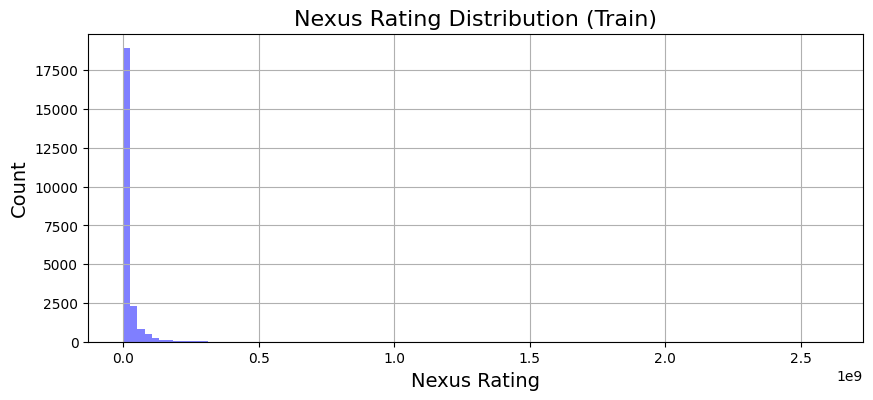

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [32]:
def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

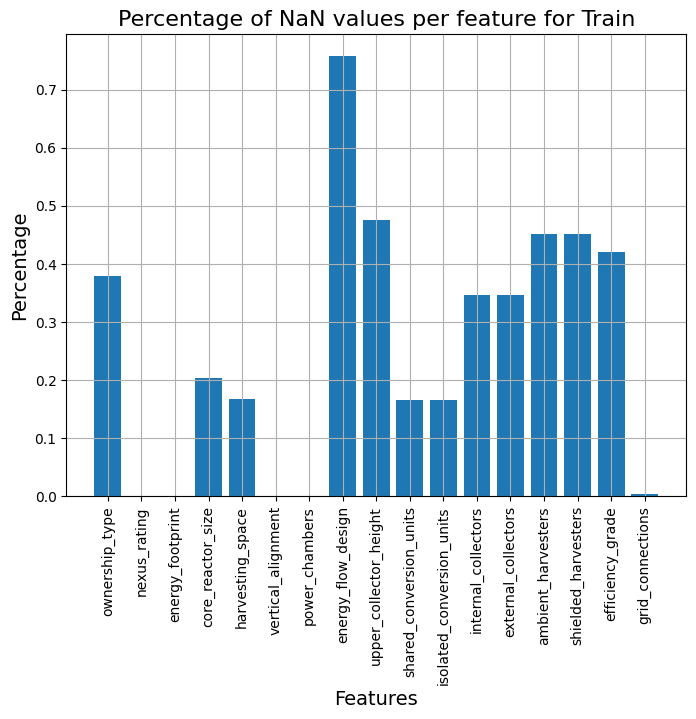

In [33]:
# Visualize amt. of NaN values - Train
plt.figure(figsize=(8, 6))
plt.bar(train.columns, train.isnull().mean())
plt.grid(True)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of NaN values per feature for Train', fontsize=16)
plt.xticks(rotation=90)
plt.show()

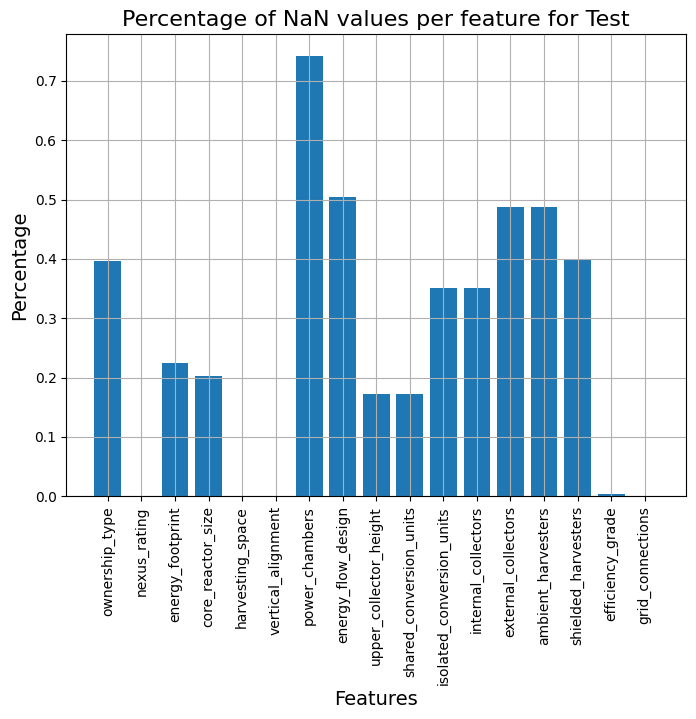

In [34]:
# Visualize amt. of NaN values - Test
plt.figure(figsize=(8, 6))
plt.bar(test.columns, test.isnull().mean())
plt.grid(True)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of NaN values per feature for Test', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [35]:
# data cleaning
# shift columns to correct values for the test set

for i in range(1, len(train.columns) - 1):
    current_col = train.columns[i]
    next_col = train.columns[i + 1]
    train[current_col] = train[next_col]

In [36]:
test_org = test.copy()

train_target = train['nexus_rating']

test_target = test['nexus_rating']

# Log transform the target variable
train_target_log = np.log1p(train_target)
test_target_log = np.log1p(test_target)
pd.DataFrame(test).describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9.937000e+03
mean,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,2.327010e+07
std,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,4.345831e+07
min,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+06
25%,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.599000e+06
50%,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.100000e+07
75%,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.074351e+07
max,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9.285855e+08


RMSLE: 0.2812515739771676


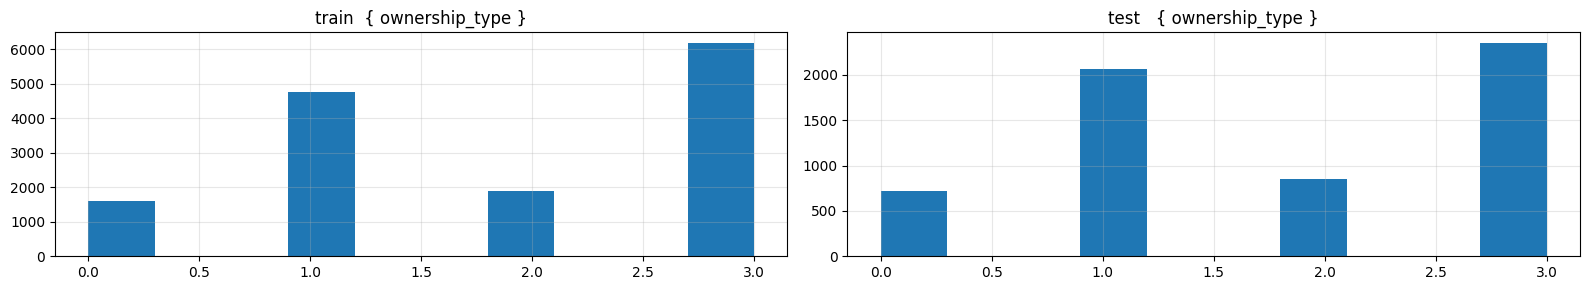

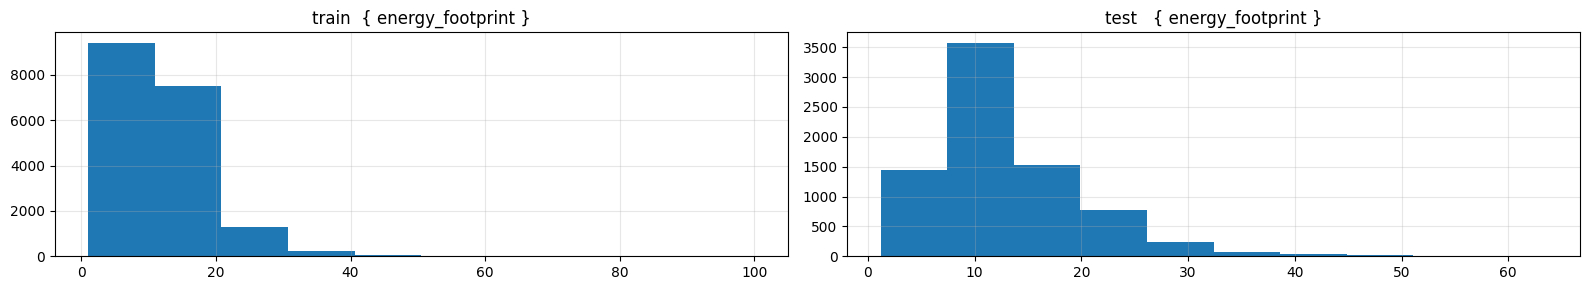

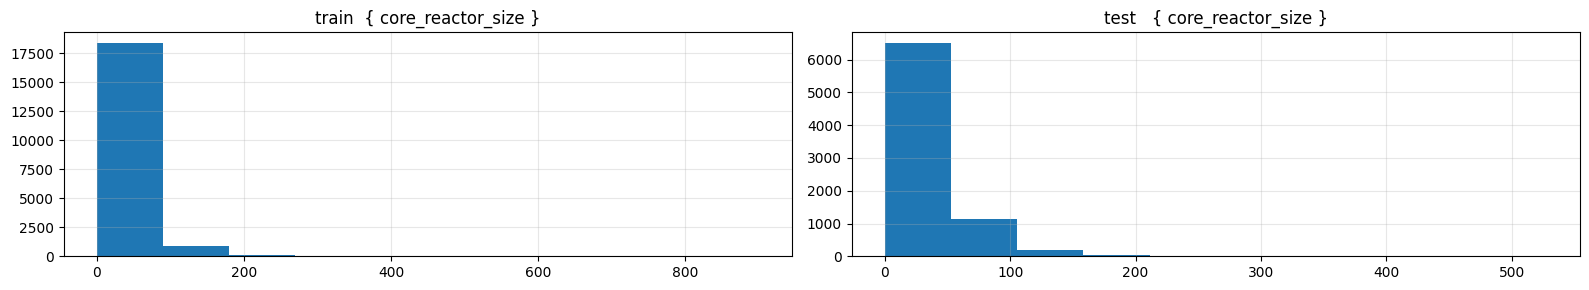

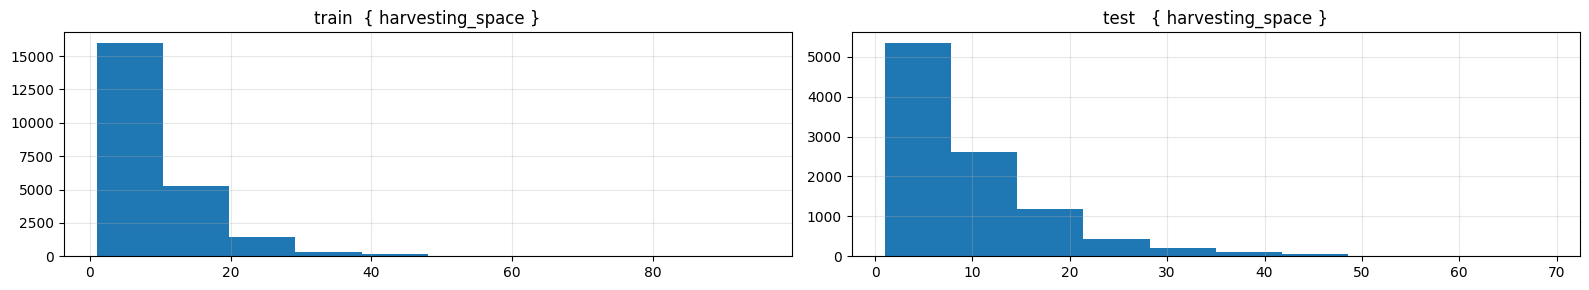

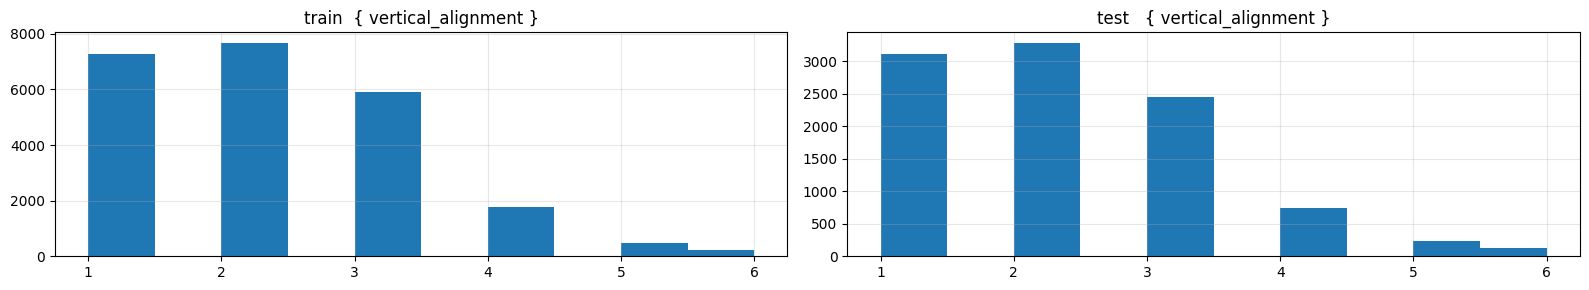

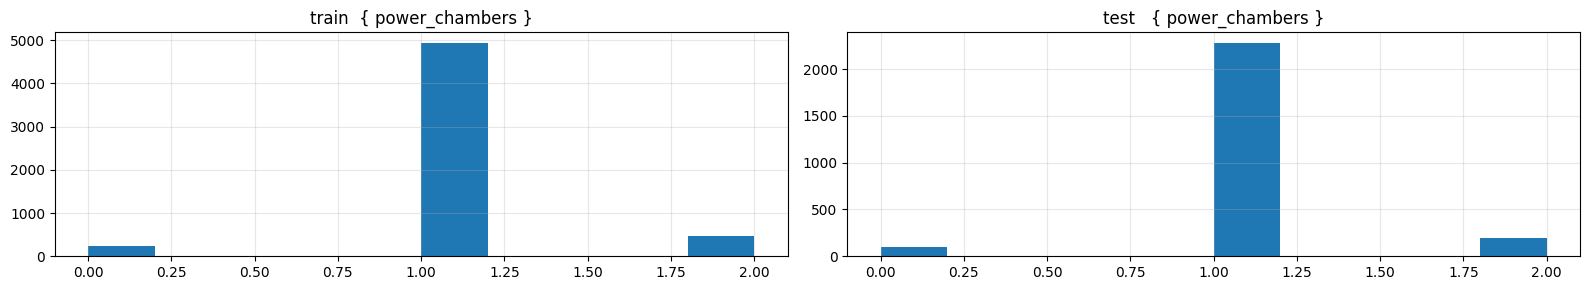

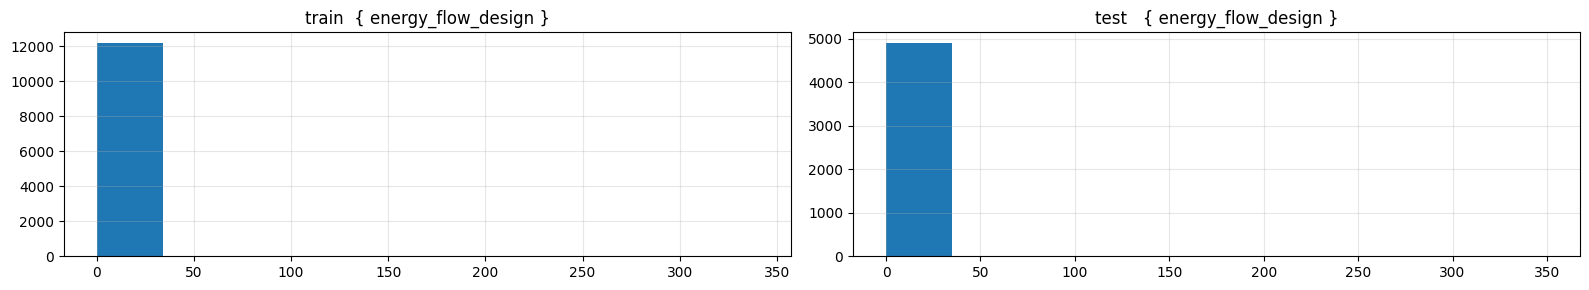

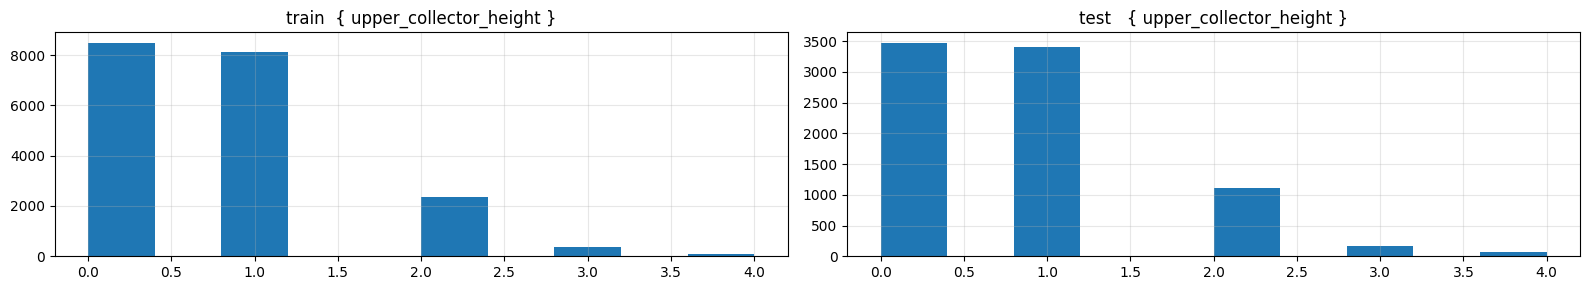

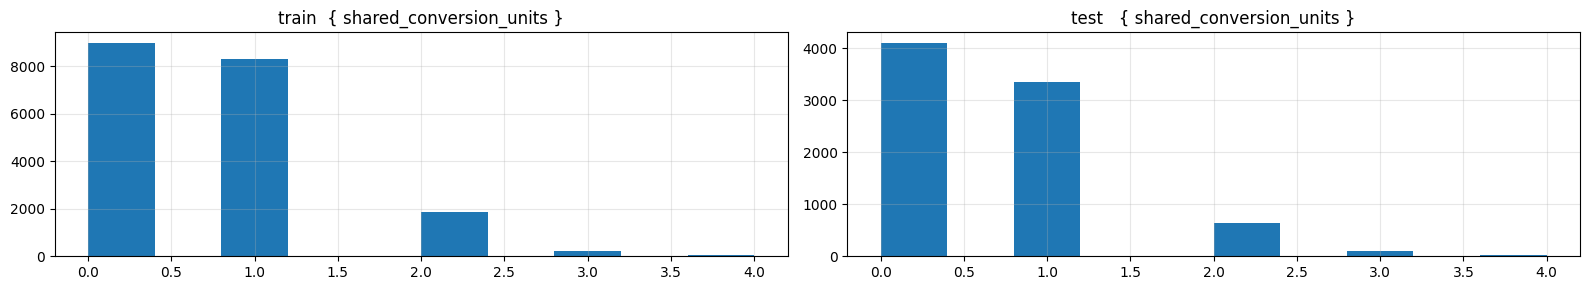

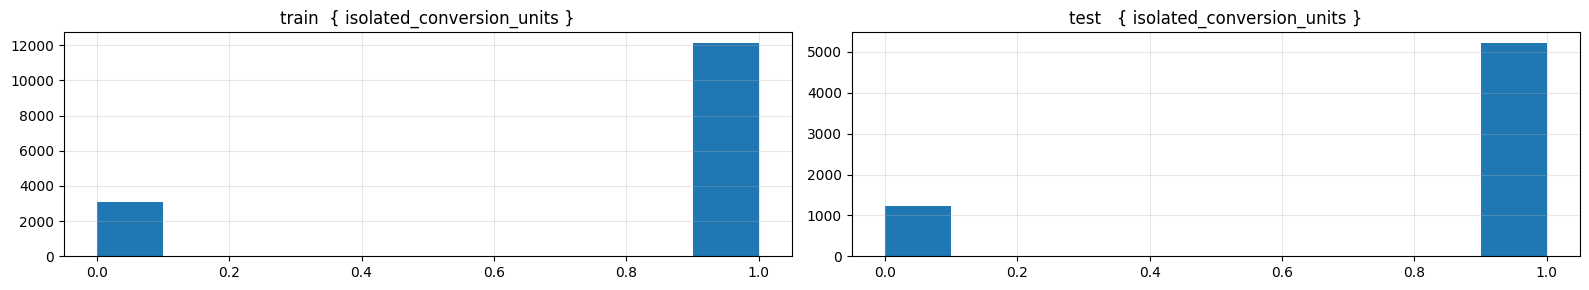

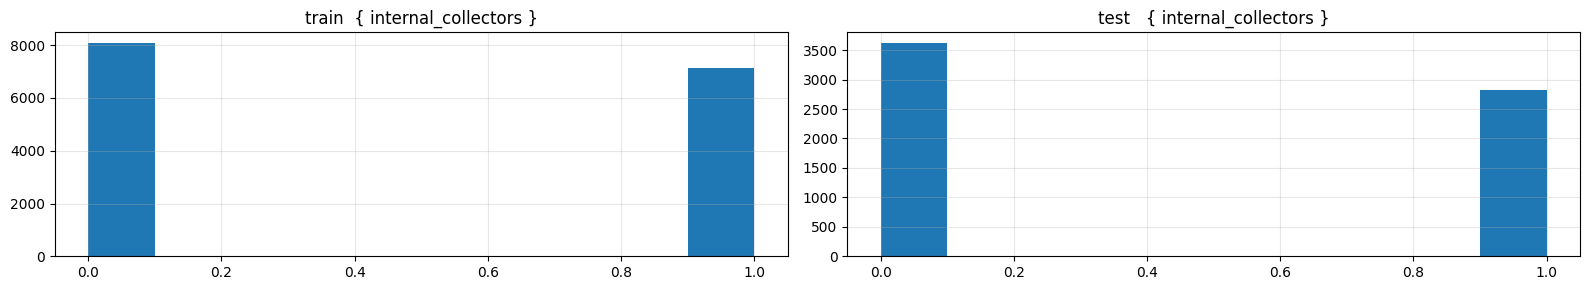

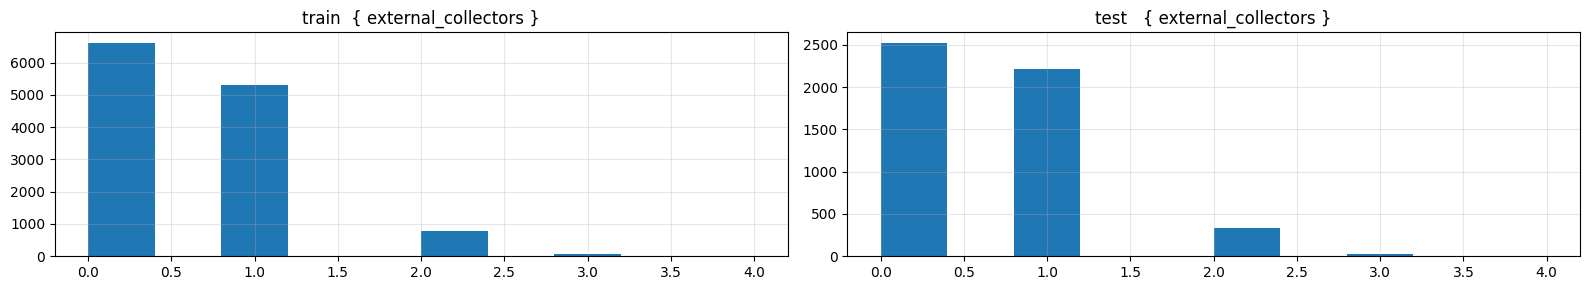

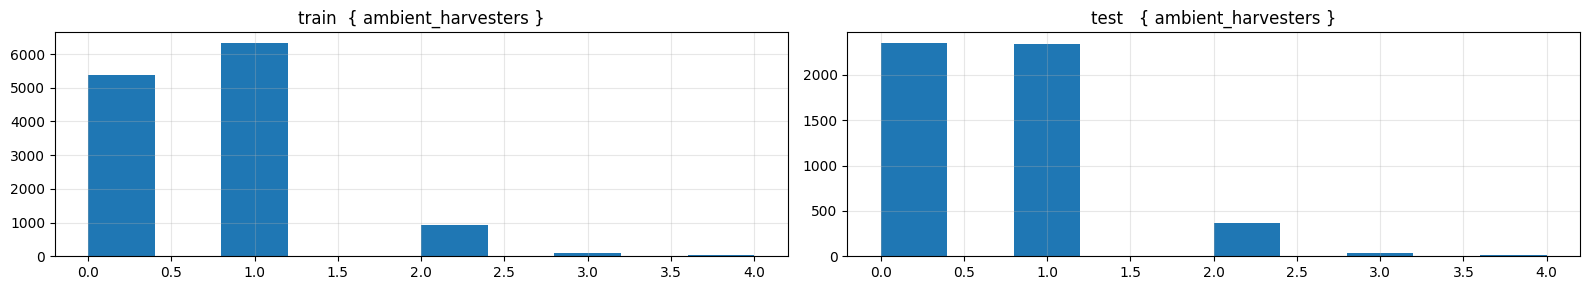

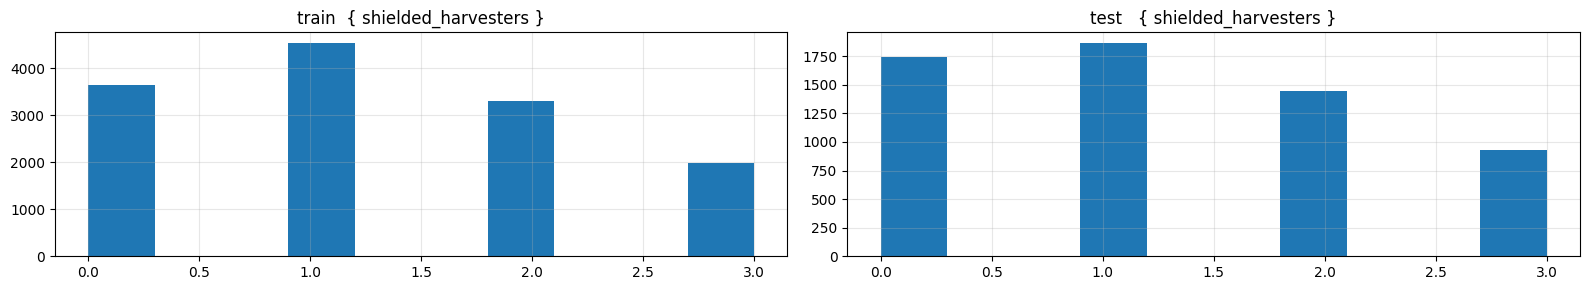

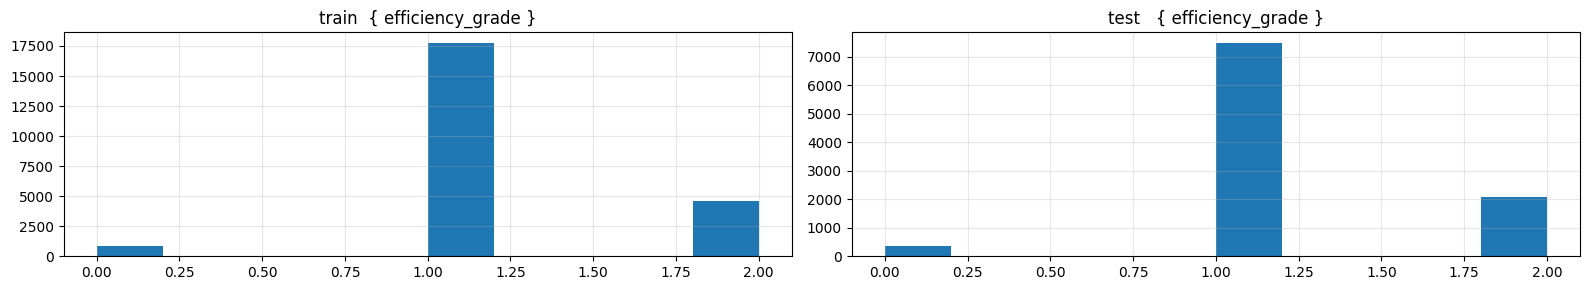

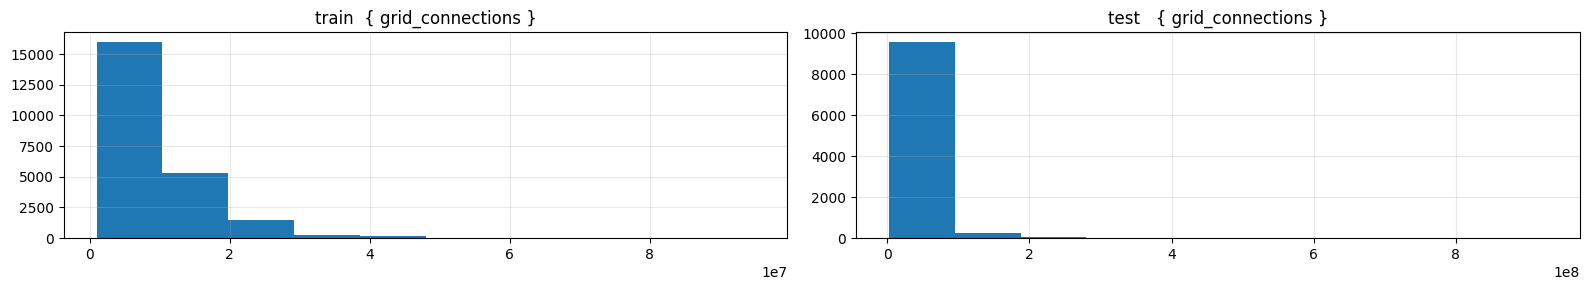

In [37]:
# fix training set based on my observations 

# keep a copy of harvesting_space (to become grid_connections)
train_harvesting_space_cp = train["harvesting_space"].copy()

train["grid_connections"] = train_harvesting_space_cp * (10 ** 6)

# set up target / features 
train_target = train["nexus_rating"].dropna()
train_features = train.drop(columns="nexus_rating")

y_true = test["nexus_rating"]
test_features = test.drop(columns=["nexus_rating", "pred"], errors="ignore")

# align columns 
test_features = test_features[train_features.columns]

# model: RandomForest regressor 
clf = ensemble.RandomForestRegressor(max_depth=20, random_state=42)
clf.fit(train_features, train_target)
y_pred = clf.predict(test_features)

def rmsle(y_true, y_pred):
   
    y_true = np.maximum(y_true, 0)
    y_pred = np.maximum(y_pred, 0)
    return float(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print("RMSLE:", rmsle(y_true, y_pred))

# plot train vs test histograms 
for col in train.select_dtypes(include=["number"]).columns:
    if col == "nexus_rating":
        continue
    plt.figure(figsize=(16, 3))

    plt.subplot(1, 2, 1)
    train[col].hist()
    plt.title(f"train  {{ {col} }}")
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    test[col].hist()
    plt.title(f"test   {{ {col} }}")
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [38]:
# Example rmsle check
print("RMSLE:", rmsle(y_true, y_pred))
print('Required RMSLE: ', 0.294)

RMSLE: 0.2812515739771676
Required RMSLE:  0.294


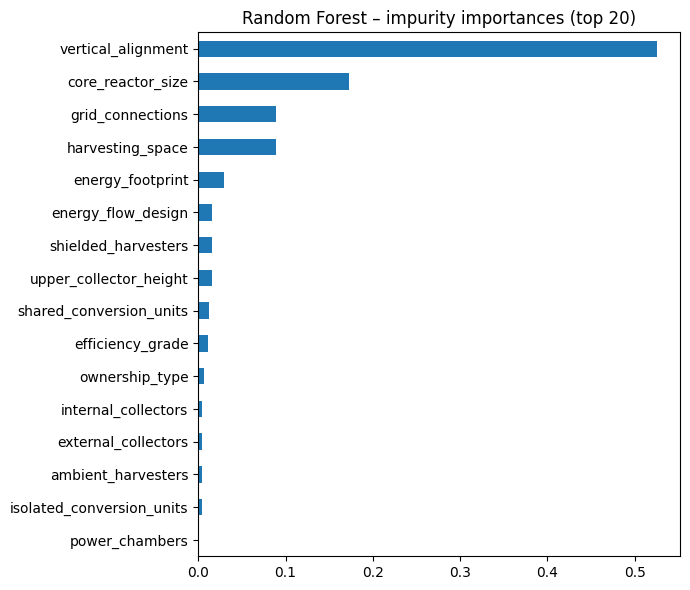

In [39]:
# Feature importances

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Impurity-based importances (built-in)
imp = pd.Series(clf.feature_importances_, index=train_features.columns).sort_values()
plt.figure(figsize=(7,6))
imp.tail(20).plot(kind="barh")
plt.title("Random Forest – impurity importances (top 20)")
plt.tight_layout(); plt.show()


Interpretation: 
- vertical_alignment dominates (~50%+ of total importance): the forest relies on it more than all others combined, so it’s the strongest driver of nexus_rating.
- A second tier—harvesting_space, efficiency_grade, grid_connections, core_reactor_size—adds meaningful but much smaller signal (each ~8–12%).
- The long tail (e.g., energy_footprint, collector counts) contributes little; these may be weak, redundant, or only useful via interactions.